In [47]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [48]:
# we will not be using synopsis for this dataset
df=pd.read_csv("clean_df.csv").drop(["Film","Unnamed: 0", "synopsis"], axis=1)
df = df.replace("DNF", np.nan)
df = df.apply(pd.to_numeric)
print(df.columns)
print(df.dtypes)
df

Index(['Seb', 'Jos', 'Coen', 'Stijn', 'Merle', 'Twan', 'Budget',
       'Cumulative Worldwide Gross', 'year', 'rating', 'votes', 'Action',
       'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Romance', 'Short',
       'Biography', 'Crime', 'History', 'War', 'Western', 'Talk-Show',
       'Animation', 'Comedy', 'Fantasy', 'Music', 'Family', 'Sport', 'Mystery',
       'Horror', 'Documentary', 'Musical'],
      dtype='object')
Seb                           float64
Jos                           float64
Coen                          float64
Stijn                         float64
Merle                         float64
Twan                          float64
Budget                        float64
Cumulative Worldwide Gross    float64
year                          float64
rating                        float64
votes                         float64
Action                           bool
Adventure                        bool
Sci-Fi                           bool
Thriller                         bool
Dra

,Seb,Jos,Coen,Stijn,Merle,Twan,Budget,Cumulative Worldwide Gross,year,rating,...,Animation,Comedy,Fantasy,Music,Family,Sport,Mystery,Horror,Documentary,Musical
0,8.0,8.25,NaN,8.30,8.000,NaN,160000000.0,825532764.0,2010.0,8.8,...,False,False,False,False,False,False,False,False,False,False
1,9.0,9.00,NaN,9.10,NaN,NaN,10000000.0,225933435.0,1997.0,8.3,...,False,False,False,False,False,False,False,False,False,False
2,7.0,7.00,6.5,4.60,8.300,NaN,3000.0,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,7.0,7.20,7.0,3.70,6.900,NaN,75000000.0,NaN,1996.0,7.0,...,False,False,False,False,False,False,False,False,False,False
4,10.0,8.80,8.5,7.70,NaN,NaN,20000000.0,98275238.0,2015.0,8.1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8.0,7.00,4.5,9.32,NaN,7.496,7000000.0,34266564.0,2000.0,7.6,...,False,False,False,False,False,False,False,True,False,False
80,7.5,8.00,6.5,7.87,7.545,NaN,4000000.0,30039392.0,2004.0,7.9,...,False,True,False,False,False,False,False,True,False,False
81,9.0,7.60,6.4,6.09,NaN,NaN,46000000.0,23737523.0,2016.0,7.1,...,False,False,False,False,False,False,False,False,False,False
82,7.5,9.00,8.2,7.34,NaN,NaN,47000000.0,203388186.0,2016.0,7.9,...,False,False,False,False,False,False,True,False,False,False


# Data understanding

## Correlations

C:\Users\SJNic\AppData\Local\Temp\ipykernel_13880\2226018453.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot: >

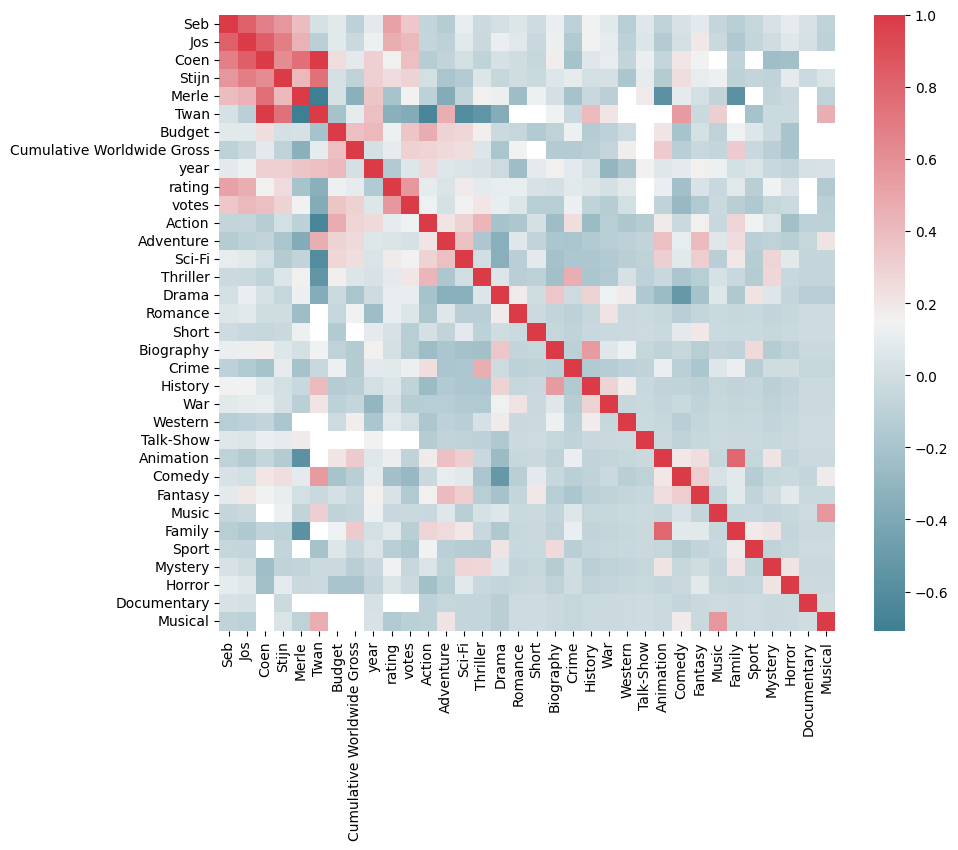

In [49]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<AxesSubplot: >

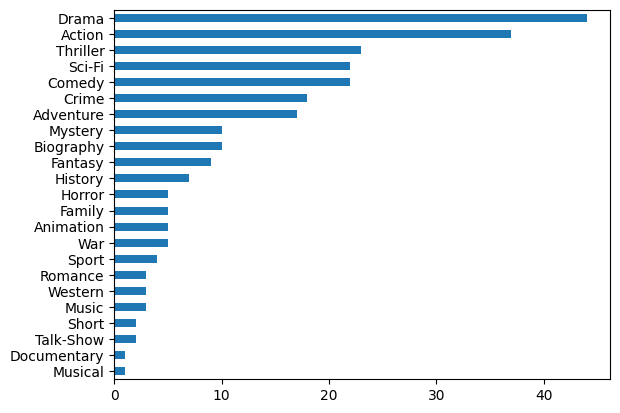

In [50]:
df.iloc[:,11:].sum().sort_values(ascending=True).plot(kind="barh") 

## Logs

In [51]:
df.describe(include=(np.number))

,Seb,Jos,Coen,Stijn,Merle,Twan,Budget,Cumulative Worldwide Gross,year,rating,votes
count,84.000000,84.000000,43.000000,78.000000,45.000000,11.000000,7.700000e+01,5.700000e+01,83.000000,79.000000,7.900000e+01
mean,7.636905,7.587500,7.118605,7.629872,7.879444,7.512545,4.900977e+07,1.971789e+08,2001.397590,7.803797,5.826137e+05
std,1.489625,1.547168,1.589737,1.802122,1.384746,1.769816,5.343370e+07,1.790534e+08,16.860214,0.739619,4.857559e+05
min,1.500000,1.500000,1.800000,2.190000,2.690000,3.141000,3.000000e+03,1.004558e+06,1941.000000,3.600000,5.690300e+04
25%,7.000000,7.200000,6.500000,7.030000,7.090000,7.271500,1.100000e+07,8.057377e+07,1995.000000,7.400000,2.559445e+05
50%,8.000000,7.800000,7.400000,7.890000,8.090000,7.496000,2.800000e+07,1.735676e+08,2004.000000,7.900000,4.813960e+05
75%,8.500000,8.525000,8.150000,8.995000,8.780000,8.309500,8.500000e+07,2.432402e+08,2015.000000,8.300000,7.092435e+05
max,10.000000,10.000000,9.600000,10.000000,9.990000,9.999000,2.000000e+08,8.255328e+08,2022.000000,9.000000,2.611813e+06


<AxesSubplot: >

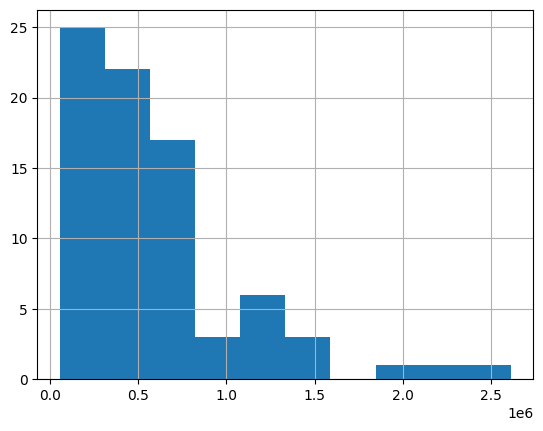

In [52]:
df["votes"].hist()

In [53]:
df["LogGross"] = np.log(df["Cumulative Worldwide Gross"]+1)
df["LogBudget"] = np.log(df["Budget"]+1)
df["LogVotes"] = np.log(df["votes"]+1)

<AxesSubplot: >

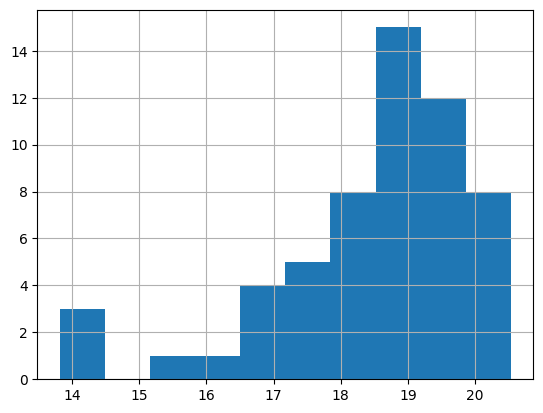

In [54]:
df["LogGross"].hist()

## Check bools

In [55]:
df.describe(include=(np.bool))

C:\Users\SJNic\AppData\Local\Temp\ipykernel_13880\2501911931.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=(np.bool))


,Action,Adventure,Sci-Fi,Thriller,Drama,Romance,Short,Biography,Crime,History,...,Animation,Comedy,Fantasy,Music,Family,Sport,Mystery,Horror,Documentary,Musical
count,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,47,67,62,61,44,81,82,74,66,77,...,79,62,75,81,79,80,74,79,83,83


## Fill missing values

In [56]:
df.isna().sum().sort_values(ascending=False)

Twan                          73
Coen                          41
Merle                         39
Cumulative Worldwide Gross    27
LogGross                      27
LogBudget                      7
Budget                         7
Stijn                          6
votes                          5
LogVotes                       5
rating                         5
year                           1
Talk-Show                      0
Musical                        0
Documentary                    0
Horror                         0
Mystery                        0
Sport                          0
Family                         0
Music                          0
Fantasy                        0
Comedy                         0
Animation                      0
Seb                            0
Western                        0
War                            0
History                        0
Crime                          0
Jos                            0
Short                          0
Romance   

In [57]:
means = df.mean()
means

Seb                           7.636905e+00
Jos                           7.587500e+00
Coen                          7.118605e+00
Stijn                         7.629872e+00
Merle                         7.879444e+00
Twan                          7.512545e+00
Budget                        4.900977e+07
Cumulative Worldwide Gross    1.971789e+08
year                          2.001398e+03
rating                        7.803797e+00
votes                         5.826137e+05
Action                        4.404762e-01
Adventure                     2.023810e-01
Sci-Fi                        2.619048e-01
Thriller                      2.738095e-01
Drama                         5.238095e-01
Romance                       3.571429e-02
Short                         2.380952e-02
Biography                     1.190476e-01
Crime                         2.142857e-01
History                       8.333333e-02
War                           5.952381e-02
Western                       3.571429e-02
Talk-Show  

In [58]:
df = df.fillna(means)
df

,Seb,Jos,Coen,Stijn,Merle,Twan,Budget,Cumulative Worldwide Gross,year,rating,...,Music,Family,Sport,Mystery,Horror,Documentary,Musical,LogGross,LogBudget,LogVotes
0,8.0,8.25,7.118605,8.30,8.000000,7.512545,160000000.0,8.255328e+08,2010.00000,8.800000,...,False,False,False,False,False,False,False,20.531540,18.890684,14.654977
1,9.0,9.00,7.118605,9.10,7.879444,7.512545,10000000.0,2.259334e+08,1997.00000,8.300000,...,False,False,False,False,False,False,False,19.235751,16.118096,13.769130
2,7.0,7.00,6.500000,4.60,8.300000,7.512545,3000.0,1.971789e+08,2001.39759,7.803797,...,False,False,False,False,False,False,False,18.477134,8.006701,12.958174
3,7.0,7.20,7.000000,3.70,6.900000,7.512545,75000000.0,1.971789e+08,1996.00000,7.000000,...,False,False,False,False,False,False,False,18.477134,18.132999,13.258322
4,10.0,8.80,8.500000,7.70,7.879444,7.512545,20000000.0,9.827524e+07,2015.00000,8.100000,...,False,False,False,False,False,False,False,18.403283,16.811243,13.052160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8.0,7.00,4.500000,9.32,7.879444,7.496000,7000000.0,3.426656e+07,2000.00000,7.600000,...,False,False,False,False,True,False,False,17.349681,15.761421,13.298853
80,7.5,8.00,6.500000,7.87,7.545000,7.512545,4000000.0,3.003939e+07,2004.00000,7.900000,...,False,False,False,False,True,False,False,17.218020,15.201805,13.225474
81,9.0,7.60,6.400000,6.09,7.879444,7.512545,46000000.0,2.373752e+07,2016.00000,7.100000,...,False,False,False,False,False,False,False,16.982568,17.644152,11.633239
82,7.5,9.00,8.200000,7.34,7.879444,7.512545,47000000.0,2.033882e+08,2016.00000,7.900000,...,False,False,False,True,False,False,False,19.130627,17.665658,13.435688


In [59]:
df.isna().sum().sort_values(ascending=False)[:5]

Seb          0
Crime        0
War          0
Western      0
Talk-Show    0
dtype: int64

## Divide by the max
To make sure the coefficients are in the same range

In [60]:
# first divide the rating colls by 10
df['rating'] = df['rating'] / 10

interesting_cols = ["year", 'LogGross', 'LogBudget','LogVotes']
df[interesting_cols].max()
df[interesting_cols] = df[interesting_cols] / df[interesting_cols].max()
df

,Seb,Jos,Coen,Stijn,Merle,Twan,Budget,Cumulative Worldwide Gross,year,rating,...,Music,Family,Sport,Mystery,Horror,Documentary,Musical,LogGross,LogBudget,LogVotes
0,8.0,8.25,7.118605,8.30,8.000000,7.512545,160000000.0,8.255328e+08,0.994065,0.88000,...,False,False,False,False,False,False,False,1.000000,0.988326,0.991839
1,9.0,9.00,7.118605,9.10,7.879444,7.512545,10000000.0,2.259334e+08,0.987636,0.83000,...,False,False,False,False,False,False,False,0.936888,0.843269,0.931886
2,7.0,7.00,6.500000,4.60,8.300000,7.512545,3000.0,1.971789e+08,0.989811,0.78038,...,False,False,False,False,False,False,False,0.899939,0.418896,0.877001
3,7.0,7.20,7.000000,3.70,6.900000,7.512545,75000000.0,1.971789e+08,0.987141,0.70000,...,False,False,False,False,False,False,False,0.899939,0.948685,0.897315
4,10.0,8.80,8.500000,7.70,7.879444,7.512545,20000000.0,9.827524e+07,0.996538,0.81000,...,False,False,False,False,False,False,False,0.896342,0.879533,0.883362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8.0,7.00,4.500000,9.32,7.879444,7.496000,7000000.0,3.426656e+07,0.989120,0.76000,...,False,False,False,False,True,False,False,0.845026,0.824608,0.900058
80,7.5,8.00,6.500000,7.87,7.545000,7.512545,4000000.0,3.003939e+07,0.991098,0.79000,...,False,False,False,False,True,False,False,0.838613,0.795330,0.895091
81,9.0,7.60,6.400000,6.09,7.879444,7.512545,46000000.0,2.373752e+07,0.997033,0.71000,...,False,False,False,False,False,False,False,0.827145,0.923109,0.787330
82,7.5,9.00,8.200000,7.34,7.879444,7.512545,47000000.0,2.033882e+08,0.997033,0.79000,...,False,False,False,True,False,False,False,0.931768,0.924234,0.909319


## Convert bools to ints

In [62]:
df = df * 1
df

,Seb,Jos,Coen,Stijn,Merle,Twan,Budget,Cumulative Worldwide Gross,year,rating,...,Music,Family,Sport,Mystery,Horror,Documentary,Musical,LogGross,LogBudget,LogVotes
0,8.0,8.25,7.118605,8.30,8.000000,7.512545,160000000.0,8.255328e+08,0.994065,0.88000,...,0,0,0,0,0,0,0,1.000000,0.988326,0.991839
1,9.0,9.00,7.118605,9.10,7.879444,7.512545,10000000.0,2.259334e+08,0.987636,0.83000,...,0,0,0,0,0,0,0,0.936888,0.843269,0.931886
2,7.0,7.00,6.500000,4.60,8.300000,7.512545,3000.0,1.971789e+08,0.989811,0.78038,...,0,0,0,0,0,0,0,0.899939,0.418896,0.877001
3,7.0,7.20,7.000000,3.70,6.900000,7.512545,75000000.0,1.971789e+08,0.987141,0.70000,...,0,0,0,0,0,0,0,0.899939,0.948685,0.897315
4,10.0,8.80,8.500000,7.70,7.879444,7.512545,20000000.0,9.827524e+07,0.996538,0.81000,...,0,0,0,0,0,0,0,0.896342,0.879533,0.883362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8.0,7.00,4.500000,9.32,7.879444,7.496000,7000000.0,3.426656e+07,0.989120,0.76000,...,0,0,0,0,1,0,0,0.845026,0.824608,0.900058
80,7.5,8.00,6.500000,7.87,7.545000,7.512545,4000000.0,3.003939e+07,0.991098,0.79000,...,0,0,0,0,1,0,0,0.838613,0.795330,0.895091
81,9.0,7.60,6.400000,6.09,7.879444,7.512545,46000000.0,2.373752e+07,0.997033,0.71000,...,0,0,0,0,0,0,0,0.827145,0.923109,0.787330
82,7.5,9.00,8.200000,7.34,7.879444,7.512545,47000000.0,2.033882e+08,0.997033,0.79000,...,0,0,0,1,0,0,0,0.931768,0.924234,0.909319


# Training the model

## Converting to tensors

In [63]:
from torch import tensor

y_seb = tensor(df.Seb)
y_jos = tensor(df.Jos)
y_coen = tensor(df.Coen)
y_stijn = tensor(df.Stijn)
y_merle = tensor(df.Merle)
y_twan = tensor(df.Twan)
y= y_jos
y

tensor([ 8.2500,  9.0000,  7.0000,  7.2000,  8.8000,  7.5000,  9.0000,  7.8000,
         6.8000,  8.0000,  7.5000,  7.2000,  8.0000,  7.9000,  9.0000,  9.5000,
         7.0000,  8.5000,  4.5000,  9.0000,  7.5000,  7.2000,  8.0000,  8.0000,
         9.6000,  7.0000,  7.3000,  7.8000, 10.0000,  7.2000,  9.0000,  6.8000,
         8.0000,  6.7000,  8.3000,  8.6000,  8.5000,  7.9000,  8.1000,  8.4000,
         8.6000,  9.3000,  1.5000,  7.0000,  8.5000,  7.3000,  7.8000,  8.7000,
         7.0000,  8.8000,  7.6000,  8.2000,  7.7000,  3.7000,  9.0000,  7.6000,
         9.0000,  8.1000,  7.7000,  6.7000,  4.0000,  8.2000,  7.5000,  6.2000,
         8.6000,  7.2000,  9.0000,  7.3000,  8.2000,  7.7000,  8.1000,  9.3000,
         2.0000,  7.3000,  7.3000,  4.0000,  5.0000,  6.7000, 10.0000,  7.0000,
         8.0000,  7.6000,  9.0000,  5.0000], dtype=torch.float64)

In [64]:
x_cols = list(df.columns[8:10]) + list(df.columns[11:] )# alles vanaf na Twan
x = tensor(df[x_cols].values * 1, dtype=torch.float)
x.shape
x

tensor([[0.9941, 0.8800, 1.0000,  ..., 1.0000, 0.9883, 0.9918],
        [0.9876, 0.8300, 0.0000,  ..., 0.9369, 0.8433, 0.9319],
        [0.9898, 0.7804, 0.0000,  ..., 0.8999, 0.4189, 0.8770],
        ...,
        [0.9970, 0.7100, 0.0000,  ..., 0.8271, 0.9231, 0.7873],
        [0.9970, 0.7900, 0.0000,  ..., 0.9318, 0.9242, 0.9093],
        [0.9654, 0.8000, 0.0000,  ..., 0.8999, 0.7063, 0.7820]])

## Setting up a linear model
Very simple at first

In [18]:
n_coeff = x.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.3846, -0.3293, -0.1192, -0.3081,  0.4805, -0.0089,  0.3361, -0.3930,
         0.0437,  0.1824, -0.4851, -0.1277,  0.2202, -0.0078, -0.0488,  0.3141,
         0.3394,  0.3918,  0.2643,  0.0202, -0.3484, -0.3317,  0.3989,  0.1824,
        -0.2057,  0.1344, -0.0688, -0.4496])

In [19]:
x*coeffs

tensor([[-0.3823, -0.2898, -0.1192,  ...,  0.1344, -0.0680, -0.4459],
        [-0.3798, -0.2733, -0.0000,  ...,  0.1259, -0.0580, -0.4190],
        [-0.3807, -0.2570, -0.0000,  ...,  0.1209, -0.0288, -0.3943],
        ...,
        [-0.3834, -0.2338, -0.0000,  ...,  0.1111, -0.0635, -0.3540],
        [-0.3834, -0.2602, -0.0000,  ...,  0.1252, -0.0636, -0.4088],
        [-0.3713, -0.2635, -0.0000,  ...,  0.1209, -0.0486, -0.3516]])

In [20]:
# calculate predictions
preds = (x*coeffs).sum(axis=1)
preds

tensor([-1.0074, -1.0613, -0.5601, -0.9047, -0.9539, -0.3681, -0.3283, -1.3424,
        -0.5557, -1.5841, -1.5739, -1.0239,  0.2457, -1.1137, -0.5069, -1.3832,
        -1.3123, -0.4158, -1.2005,  0.1215, -0.9314, -0.7055, -0.4147, -0.6008,
        -1.2891, -1.6081, -1.0402, -1.0817, -0.6490, -0.6153, -1.0234, -1.1198,
        -0.9617, -1.3699, -0.6217, -1.1784, -1.0965, -0.8170, -0.4488,  0.1306,
        -0.1262, -0.6040, -1.3956, -1.0842, -0.4126, -1.1303, -0.6789, -0.6792,
        -0.5952, -1.1501, -0.6088, -0.1521, -0.6061, -1.5216, -0.5675, -0.9494,
        -0.5974, -0.5561, -0.7901, -1.4668, -0.5886, -0.4649, -1.2743, -0.8084,
        -0.7007, -0.9843, -0.2436,  0.2280, -0.6326, -0.8178, -0.3082, -0.6340,
        -0.4456, -0.0666, -0.7318, -0.4188, -0.7843, -0.7283, -0.1788, -0.7287,
        -0.2475, -0.7153, -0.5059, -0.5947])

In [21]:
# calculate loss
loss = torch.abs(preds-y).mean()
loss

tensor(8.3413, dtype=torch.float64)

In [22]:
def calc_pred(coeffs, x): return (x*coeffs).sum(axis=1)
def calc_loss(coeffs, x, y): return torch.abs(calc_pred(coeffs, x)-y).mean()

## Gradient descent step

In [23]:
coeffs.requires_grad_() # in place operation

tensor([-0.3846, -0.3293, -0.1192, -0.3081,  0.4805, -0.0089,  0.3361, -0.3930,
         0.0437,  0.1824, -0.4851, -0.1277,  0.2202, -0.0078, -0.0488,  0.3141,
         0.3394,  0.3918,  0.2643,  0.0202, -0.3484, -0.3317,  0.3989,  0.1824,
        -0.2057,  0.1344, -0.0688, -0.4496], requires_grad=True)

In [24]:
loss = calc_loss(coeffs, x, y)
loss

tensor(8.3413, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [25]:
loss.backward()

In [26]:
coeffs.grad

tensor([-0.9898, -0.7804, -0.4405, -0.2024, -0.2619, -0.2738, -0.5238, -0.0357,
        -0.0238, -0.1190, -0.2143, -0.0833, -0.0595, -0.0357, -0.0238, -0.0595,
        -0.2619, -0.1071, -0.0357, -0.0595, -0.0476, -0.1190, -0.0595, -0.0119,
        -0.0119, -0.8999, -0.8827, -0.8770])

In [27]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    print(calc_loss(coeffs, x, y))

tensor(7.8630, dtype=torch.float64)


## Training the linear model

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.3)
len(x_train), len(x_test)

(58, 26)

In [29]:
def update_coeffs(coeffs, lr): coeffs.sub_(coeffs.grad * lr)
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, x_train, y_train)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")


def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [30]:
def train_model(epochs=100, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [31]:
coeffs = train_model(1000, lr=0.001)

7.681; 7.676; 7.666; 7.652; 7.633; 7.609; 7.581; 7.547; 7.509; 7.466; 7.419; 7.366; 7.309; 7.247; 7.180; 7.109; 7.033; 6.952; 6.866; 6.775; 6.680; 6.580; 6.475; 6.369; 6.260; 6.145; 6.027; 5.904; 5.776; 5.644; 5.508; 5.368; 5.222; 5.073; 4.919; 4.761; 4.598; 4.431; 4.259; 4.083; 3.903; 3.725; 3.543; 3.364; 3.182; 2.995; 2.805; 2.628; 2.452; 2.275; 2.111; 1.945; 1.786; 1.637; 1.512; 1.406; 1.327; 1.286; 1.274; 1.298; 1.353; 1.446; 1.567; 1.708; 1.863; 2.035; 2.217; 2.424; 2.637; 2.847; 3.052; 3.253; 3.450; 3.642; 3.832; 4.020; 4.204; 4.383; 4.557; 4.726; 4.890; 5.050; 5.205; 5.355; 5.501; 5.641; 5.777; 5.908; 6.035; 6.156; 6.273; 6.385; 6.493; 6.595; 6.693; 6.786; 6.874; 6.958; 7.036; 7.110; 7.179; 7.244; 7.303; 7.358; 7.408; 7.454; 7.494; 7.530; 7.561; 7.588; 7.609; 7.626; 7.638; 7.645; 7.647; 7.645; 7.638; 7.626; 7.610; 7.588; 7.562; 7.531; 7.495; 7.455; 7.410; 7.360; 7.305; 7.246; 7.181; 7.112; 7.038; 6.960; 6.876; 6.788; 6.695; 6.598; 6.495; 6.388; 6.276; 6.160; 6.038; 5.912; 5.781;

In [32]:
def show_coeffs(): return dict(zip(x_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'year': tensor(2.5817),
 'rating': tensor(2.9513),
 'Action': tensor(1.0880),
 'Adventure': tensor(-1.4218),
 'Sci-Fi': tensor(0.7738),
 'Thriller': tensor(0.8318),
 'Drama': tensor(0.1845),
 'Romance': tensor(0.3669),
 'Short': tensor(0.2799),
 'Biography': tensor(0.1214),
 'Crime': tensor(-0.6153),
 'History': tensor(0.5389),
 'War': tensor(0.6880),
 'Western': tensor(-1.5705),
 'Talk-Show': tensor(1.3003),
 'Animation': tensor(-1.3159),
 'Comedy': tensor(-0.4070),
 'Fantasy': tensor(2.5921),
 'Music': tensor(-0.0424),
 'Family': tensor(-1.1145),
 'Sport': tensor(-0.3602),
 'Mystery': tensor(-1.0286),
 'Horror': tensor(0.9352),
 'Documentary': tensor(0.3943),
 'Musical': tensor(-0.2564),
 'LogGross': tensor(2.4186),
 'LogBudget': tensor(3.3571),
 'LogVotes': tensor(3.6741)}

# Measuring accuracy

In [33]:
preds = calc_pred(coeffs, x_test)
preds, y_test

(tensor([13.8531, 16.0802, 13.9368, 11.8871, 12.7377, 13.0530, 14.0175, 16.6502,
         12.9721, 12.7422, 15.8160, 13.4438, 14.7327, 14.6957, 15.6654, 12.2951,
         15.2412, 12.5828, 14.8543, 15.5615, 14.3473, 12.1279, 11.5570, 16.5086,
         11.6222, 13.0199]),
 tensor([7.8000, 8.7000, 4.5000, 8.0000, 7.6000, 7.9000, 8.2000, 9.0000, 9.0000,
         6.7000, 8.2500, 8.0000, 7.5000, 7.5000, 9.3000, 8.0000, 7.5000, 7.7000,
         7.2000, 7.0000, 9.3000, 7.0000, 2.0000, 7.3000, 7.3000, 8.8000],
        dtype=torch.float64))

[(0.0, 11.0), (0.0, 11.0)]

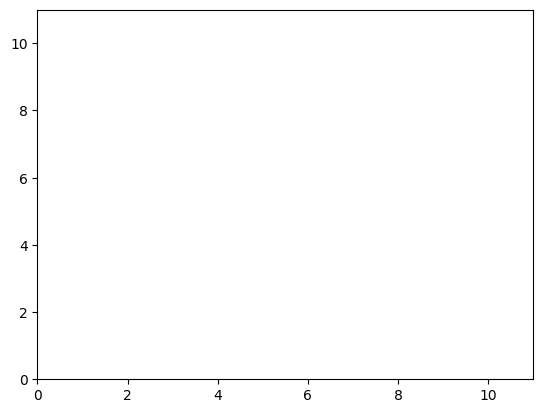

In [34]:
g= sns.regplot(x=preds.cpu().detach().numpy(),y=y_test.cpu().detach().numpy())
g.set(xlim=(0,11), ylim=(0,11))

In [35]:
def MSE(preds, y_test): return ((y_test - preds) * (y_test - preds)).mean()
MSE(preds, y_test)

tensor(43.1870, dtype=torch.float64)

#  Using a framework

## preprocessing the data

In [129]:
from fastai.tabular.all import *

In [130]:
splits = RandomSplitter(seed=42)(df)

In [131]:
df.columns

Index(['Seb', 'Jos', 'Coen', 'Stijn', 'Merle', 'Twan', 'Budget',
       'Cumulative Worldwide Gross', 'year', 'rating', 'votes', 'Action',
       'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Romance', 'Short',
       'Biography', 'Crime', 'History', 'War', 'Western', 'Talk-Show',
       'Animation', 'Comedy', 'Fantasy', 'Music', 'Family', 'Sport', 'Mystery',
       'Horror', 'Documentary', 'Musical', 'LogGross', 'LogBudget',
       'LogVotes'],
      dtype='object')

In [132]:
# dls = TabularPandas(
#     df, splits=splits, # how to split the data
#     cat_names = ['Action',
#        'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Romance', 'Short',
#        'Biography', 'Crime', 'History', 'War', 'Western', 'Talk-Show',
#        'Animation', 'Comedy', 'Fantasy', 'Music', 'Family', 'Sport', 'Mystery',
#        'Horror', 'Documentary', 'Musical'], # categorical variables
#     cont_names = ['year', 'rating', 'LogGross', 'LogBudget', 'LogVotes'], # constinious variables
#     y_names = ['Seb', 'Jos', 'Coen', 'Stijn', 'Merle', 'Twan'], # y_hat
#     y_block = RegressionBlock()   # type of y
# ).dataloaders(path=".")

In [133]:
dls = TabularPandas(
    df, splits=splits, # how to split the data
    cont_names = ['year', 'rating', 'LogGross', 'LogBudget', 'LogVotes', 
                  'Action',
       'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Romance', 'Short',
       'Biography', 'Crime', 'History', 'War', 'Western', 'Talk-Show',
       'Animation', 'Comedy', 'Fantasy', 'Music', 'Family', 'Sport', 'Mystery',
       'Horror', 'Documentary', 'Musical'], # constinious variables
    y_names = ['Seb', 'Jos', 'Stijn', 'Coen', 'Merle'],#, 'Twan'], # y_hat
    y_block = RegressionBlock()   # type of y
).dataloaders(path=".")

In [134]:
dls.valid.show_batch()

,year,rating,LogGross,LogBudget,LogVotes,Action,Adventure,Sci-Fi,Thriller,Drama,Romance,Short,Biography,Crime,History,War,Western,Talk-Show,Animation,Comedy,Fantasy,Music,Family,Sport,Mystery,Horror,Documentary,Musical,Seb,Jos,Stijn,Coen,Merle
0,1.000000,0.81000,0.899939,0.891207,0.826384,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,10.0,7.629872,8.500000,9.150000
1,0.997033,0.78038,0.899939,0.882674,0.877001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,9.0,10.000000,8.500000,9.080000
2,0.992582,0.78000,0.886669,0.831594,0.888482,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,8.5,8.870000,7.118605,7.879445
3,0.989120,0.76000,0.845026,0.824608,0.900058,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,7.0,9.320000,4.500000,7.879445
4,0.987636,0.83000,0.936888,0.843269,0.931886,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,9.100000,7.118605,7.879445
5,0.996538,0.78000,0.911206,0.897137,0.877291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,9.0,8.120000,7.118605,7.879445
6,0.985658,0.90000,0.935813,0.884519,0.954764,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,8.170000,8.500000,7.910000
7,0.978734,0.85000,0.931826,0.848255,0.925662,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.5,8.6,8.060000,7.118605,7.879445
8,0.980218,0.81000,0.899939,0.897137,0.916596,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,8.1,4.920000,7.118605,7.879445
9,0.988625,0.87000,0.971888,0.939563,0.978069,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,8.7,7.629872,7.800000,8.150000


## Train the model

In [136]:
learn = tabular_learner(dls, metrics=rmse, layers=[28,28,5]) # two 1 input layer, 1 hidden layer and 1 output layer

SuggestedLRs(slide=0.00013182566908653826, valley=0.015848932787775993)

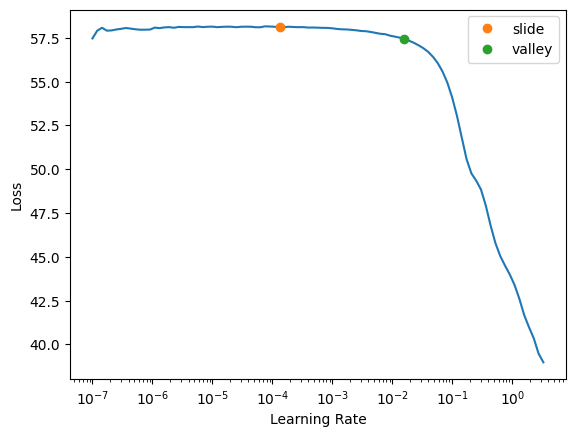

In [137]:
learn.lr_find(suggest_funcs=(slide,valley))

In [138]:
learn.fit(250, lr=0.005)

epoch,train_loss,valid_loss,_rmse,time
0,57.932705,66.101555,8.130286,00:00
1,57.839390,65.894768,8.117559,00:00
2,57.724186,65.678436,8.104223,00:00
3,57.639046,65.455246,8.090442,00:00
4,57.252892,65.205528,8.074994,00:00
5,57.082535,64.922531,8.057452,00:00
6,56.937542,64.601822,8.037525,00:00
7,56.956112,64.268890,8.016788,00:00
8,56.872246,63.895714,7.993480,00:00
9,56.899403,63.523468,7.970161,00:00


In [163]:
cols_to_look_at = df.iloc[1][:5].index
movie_id = 2

preds = learn.predict(df.iloc[movie_id])
print("Actual ratings:")
display(df[cols_to_look_at].iloc[movie_id])
print("Predicted ratings:")
preds[0][cols_to_look_at]

Actual ratings:


Seb      7.0
Jos      7.0
Coen     6.5
Stijn    4.6
Merle    8.3
Name: 2, dtype: float64

Predicted ratings:


,Seb,Jos,Coen,Stijn,Merle
0,7.00455,6.914477,6.650557,5.914811,6.960102


In [158]:
torch.save(learn.model, "models/model.pt")

# Ensemble models
Do not use for now

In [117]:
learn.get_preds(with_input=True)[1]

tensor([[7.0976, 7.9535, 8.3267, 7.9376, 8.1544, 6.7931],
        [6.2767, 7.0752, 6.8413, 7.2787, 8.6950, 7.2110],
        [7.3208, 7.6055, 8.1284, 6.8671, 7.6643, 6.9266],
        [7.1026, 8.0617, 8.2634, 7.0116, 7.9107, 7.3704],
        [6.8161, 8.0253, 8.0453, 6.7103, 7.6572, 7.1948],
        [7.8009, 8.3795, 8.9667, 7.6286, 8.3712, 7.5390],
        [7.6466, 8.1675, 8.7262, 7.3516, 8.1021, 7.2763],
        [7.5525, 8.8832, 9.0987, 7.9015, 8.7869, 8.2433],
        [7.7933, 8.3398, 8.9318, 7.6407, 8.3913, 7.5785],
        [6.6997, 6.6692, 7.0668, 6.1103, 7.0301, 6.5341],
        [6.9561, 7.1164, 7.6058, 6.7107, 7.6236, 7.1453],
        [5.2396, 5.8969, 6.3378, 5.8028, 6.1072, 4.8475],
        [8.0387, 8.7063, 9.3375, 8.0556, 8.7860, 7.9439],
        [7.2018, 7.6806, 8.1092, 6.6588, 7.4512, 6.6848],
        [6.7116, 6.8470, 7.9186, 7.1697, 8.1155, 7.8361],
        [7.3294, 8.5712, 7.0418, 7.4617, 9.2936, 9.0116]])

In [120]:
def ensemble():
    learn = tabular_learner(dls, metrics=rmse, layers=[28,28, 6])
    with learn.no_bar(),learn.no_logging(): learn.fit(200, lr=0.005)
    return learn.get_preds(with_input=True)[1]

In [121]:
learns = [ensemble() for _ in range(5)]